In [ ]:
import pandas as pd
from pandas import datetime
def parser(x):
    return datetime.strptime(x,"%d-%m-%Y %H:%M")
data = pd.read_csv('/content/sample_data/newdata.csv', header = 0, parse_dates=[0],index_col=0,squeeze=True, date_parser=parser)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


timestamp
2019-05-01 19:00:00    0.250000
2019-05-01 19:01:00    0.328090
2019-05-01 19:02:00    0.237440
2019-05-01 19:03:00    0.224980
2019-05-01 19:04:00    0.196928
                         ...   
2019-05-08 17:35:00    0.449960
2019-05-08 17:36:00    0.318766
2019-05-08 17:37:00    0.381855
2019-05-08 17:38:00    0.425040
2019-05-08 17:39:00    0.437500
Name: cpu_request, Length: 10000, dtype: float64

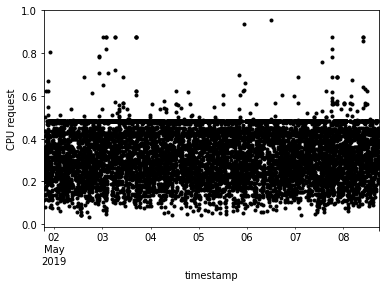

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data = data.astype(float)
data
data.plot(style='k.',ylabel='CPU request')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from scipy.linalg import pinv2
data = np.array(data)
data = np.reshape(data, (-1, 1))
data

array([[0.25     ],
       [0.32809  ],
       [0.23744  ],
       ...,
       [0.3818547],
       [0.42504  ],
       [0.4375   ]])

In [ ]:
m = 14
per = (1736 - m)/1826
size = int(len(data) * per)
d_train, d_test = data[0:size], data[size:len(data)]
mean_train = np.mean(d_train)
sd_train = np.std(d_train)
d_train = (d_train-mean_train)/sd_train
d_test = (d_test-mean_train)/sd_train

In [ ]:
X_train = np.array([d_train[i][0] for i in range(m)])
y_train = np.array(d_train[m][0])
for i in range(1,(d_train.shape[0]-m)):
    l = np.array([d_train[j][0] for j in range(i,i+m)])
    X_train = np.vstack([X_train,l])
    y_train = np.vstack([y_train,d_train[i+m]])
X_test = np.array([d_test[i][0] for i in range(m)])
y_test = np.array(d_test[m][0])
for i in range(1,(d_test.shape[0]-m)):
    l = np.array([d_test[j][0] for j in range(i,i+m)])
    X_test = np.vstack([X_test,l])
    y_test = np.vstack([y_test,d_test[i+m]])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#> (1708, 14)
#> (1708, 1)
#> (90, 14)
#> (90, 1)

(9416, 14)
(9416, 1)
(556, 14)
(556, 1)


In [ ]:
import scipy.stats as stats
input_size = X_train.shape[1]
hidden_size = 500  #no. of hidden neurons
mu, sigma = 0, 1
w_lo = -1 
w_hi = 1
b_lo = -1 
b_hi = 1
#initialising input weights and biases randomly drawn from a truncated normal distribution
input_weights = stats.truncnorm.rvs((w_lo - mu) / sigma, (w_hi - mu) / sigma, loc=mu, scale=sigma,size=[input_size,hidden_size])
biases = stats.truncnorm.rvs((b_lo - mu) / sigma, (b_hi - mu) / sigma, loc=mu, scale=sigma,size=[hidden_size])
def relu(x):      #hidden layer activation function
    return np.maximum(x, 0, x)

In [ ]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H
output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out
prediction = predict(X_test)

In [ ]:
print(prediction)

[[ 2.46175590e-01]
 [-3.18966243e-01]
 [-8.25971482e-01]
 [-7.99989301e-01]
 [-1.27805678e+00]
 [-9.94749398e-01]
 [-5.47850458e-01]
 [-3.32479265e-01]
 [-8.78606288e-01]
 [-5.29314866e-01]
 [-7.84928804e-01]
 [-6.96083751e-01]
 [-5.86782753e-01]
 [-4.39807563e-01]
 [-6.18139947e-01]
 [ 2.80446143e-01]
 [ 3.33570210e-01]
 [ 4.19687569e-02]
 [ 8.32554857e-02]
 [ 3.04905909e-01]
 [-2.04424548e-01]
 [-1.24955477e-01]
 [-2.08762740e-01]
 [-1.70231093e-01]
 [ 2.32181723e-02]
 [-4.51843087e-01]
 [-2.18412276e-01]
 [-8.22724929e-01]
 [-5.01910799e-01]
 [-5.24942336e-01]
 [-7.87508086e-01]
 [-3.35125560e-01]
 [-3.41307342e-01]
 [ 3.39275280e-01]
 [ 2.83187732e-01]
 [-2.09141249e-01]
 [-9.00977470e-01]
 [-6.56661551e-01]
 [-4.84636065e-01]
 [-6.79467656e-01]
 [-6.58358662e-02]
 [-1.94727209e-01]
 [-8.43023835e-01]
 [-2.28467113e-01]
 [ 3.44496264e-01]
 [ 5.12206472e-01]
 [ 3.91766067e-01]
 [ 4.51467005e-01]
 [ 5.30275011e-01]
 [ 7.98965904e-01]
 [ 7.72628296e-01]
 [ 9.19712853e-01]
 [ 8.8446057

In [ ]:
correct = 0
total = X_test.shape[0]
y_test = (y_test*sd_train) + mean_train
prediction = (prediction*sd_train) + mean_train
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.9f' % rmse)
from statistics import *
NRMSE = rmse/mean (prediction.flatten())
print('Test NRMSE: %.9f' % NRMSE)
se=mean_squared_error(y_test, prediction)
print('test MSE: %.9f' % se)
from sklearn.metrics import r2_score
r=r2_score(y_test, prediction)
print('test R2 score: %.9f' % r)
mape_sum = 0
for i,j in zip(y_test,prediction):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0
for i,j in zip(y_test,prediction):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100
print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

Test RMSE: 0.103163181
Test NRMSE: 0.308619641
test MSE: 0.010642642
test R2 score: 0.209559894
Test MAPE: 30.048
Test MPE: -11.502


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 11 Text major ticklabel objects>)

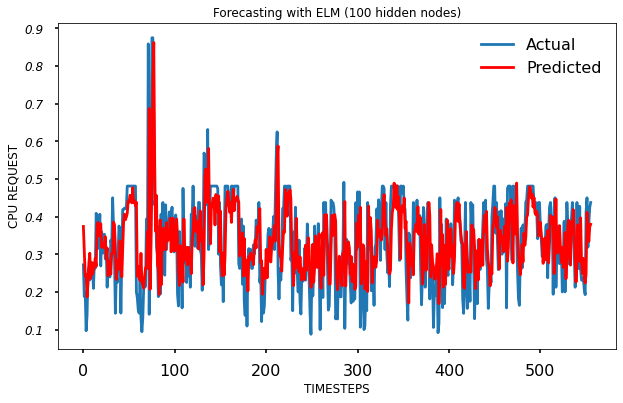

In [ ]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(y_test,label = 'Actual')
ax.plot(prediction, color='r',label = 'Predicted')
ax.legend(loc='upper right', frameon=False)
plt.xlabel('TIMESTEPS',fontname="Arial", fontsize=12)
plt.ylabel('CPU REQUEST',fontname="Arial", fontsize=12)
plt.title('Forecasting with ELM (100 hidden nodes)',fontname="Arial", fontsize=12)
#plt.xticks([0,20,40,60,80],['2017-10-02','2017-10-22','2017-11-11','2017-12-01','2017-12-21'],fontname="Arial", fontsize = 20, style='italic')
plt.yticks(fontname="Arial", fontsize = 12, style='italic')

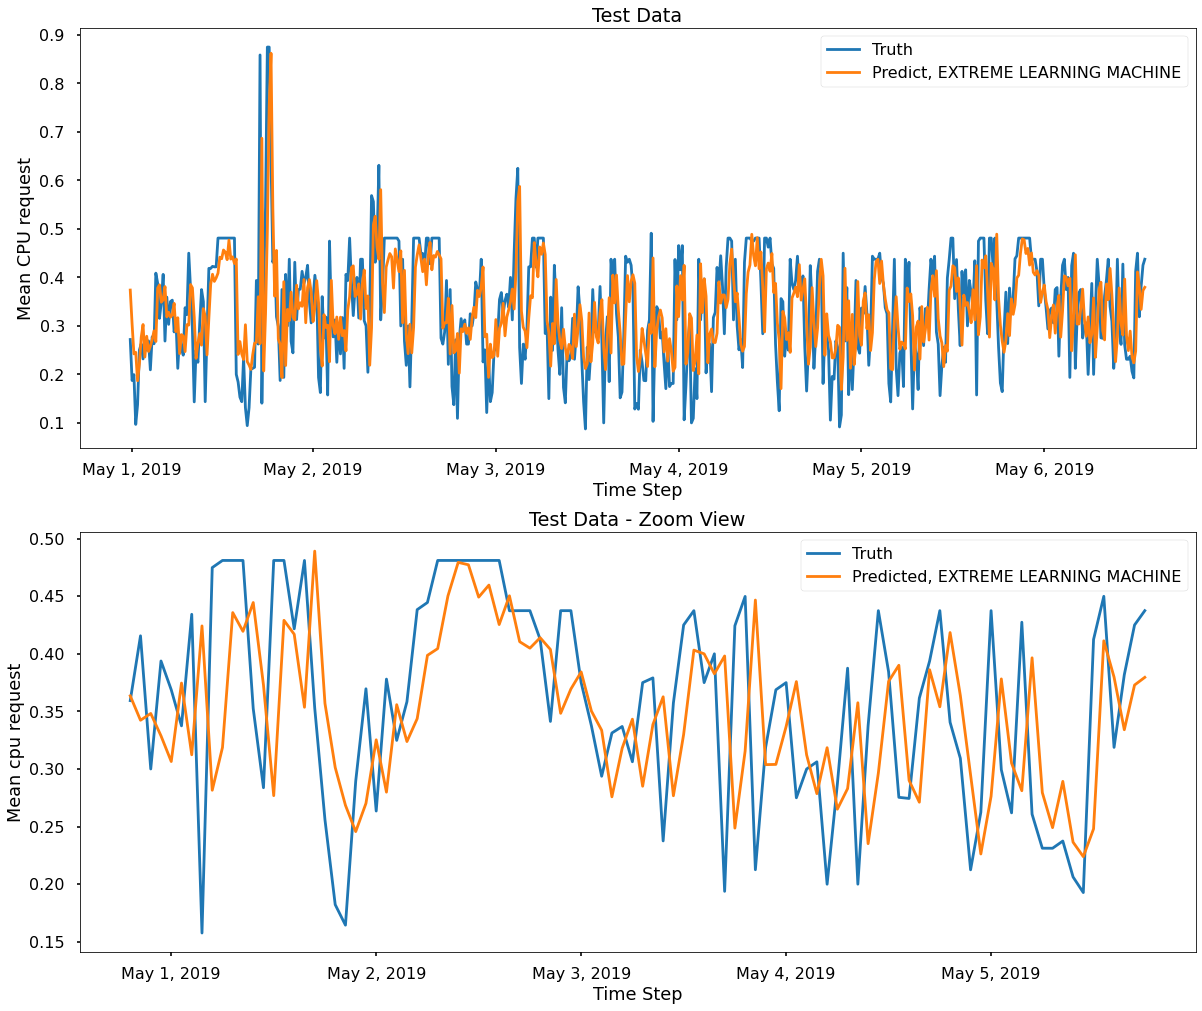

In [ ]:
predictions = pd.DataFrame(y_test)
y_pred = prediction
predictions['mid'] = y_pred
predictions.head()


plt.figure(figsize=(20,17))
plt.style.use('seaborn-poster')
plt.subplot(2,1,1)
#plt.plot(predictions[0][0:100])
plt.plot(predictions[0], label='Truth')
plt.plot(predictions['mid'],label='Predict, EXTREME LEARNING MACHINE')
x_ticks = [1, 100, 200, 300, 400, 500]
x_labels = ['May 1, 2019', 'May 2, 2019', 'May 3, 2019', 'May 4, 2019', 'May 5, 2019', 'May 6, 2019', 'May 7, 2019']
plt.xticks(ticks=x_ticks, labels = x_labels)
plt.ylabel('Mean CPU request')
plt.xlabel('Time Step')
plt.title('Test Data')
plt.legend()

plt.subplot(2,1,2)
plt.plot(predictions[0].tail(100), label='Truth')
plt.plot(predictions['mid'].tail(100), label='Predicted, EXTREME LEARNING MACHINE')
x_ticks = [460, 480, 500, 520, 540]
x_labels = ['May 1, 2019', 'May 2, 2019', 'May 3, 2019', 'May 4, 2019', 'May 5, 2019']
plt.xticks(ticks=x_ticks, labels = x_labels)
plt.ylabel('Mean cpu request')
plt.xlabel('Time Step')
plt.title('Test Data - Zoom View')
plt.legend();

In [ ]:
d1 = pd.DataFrame(prediction, columns = ['Predicted_CPU_Request'])
print(d1)

     Predicted_CPU_Request
0                 0.373853
1                 0.304491
2                 0.242265
3                 0.245454
4                 0.186779
..                     ...
551               0.411297
552               0.379765
553               0.334086
554               0.372895
555               0.379588

[556 rows x 1 columns]


In [ ]:
d2 = pd.DataFrame(y_test, columns = ['Existing_CPU_Request'])
print(d2)

     Existing_CPU_Request
0                0.271890
1                0.187480
2                0.199400
3                0.096846
4                0.137450
..                    ...
551              0.449960
552              0.318766
553              0.381855
554              0.425040
555              0.437500

[556 rows x 1 columns]


In [ ]:
results = pd.concat([d1, d2], axis=1, join='inner')
display(results)

,Predicted_CPU_Request,Existing_CPU_Request
0,0.373853,0.271890
1,0.304491,0.187480
2,0.242265,0.199400
3,0.245454,0.096846
4,0.186779,0.137450
...,...,...
551,0.411297,0.449960
552,0.379765,0.318766
553,0.334086,0.381855
554,0.372895,0.425040


In [ ]:
results['Val_Diff'] = results['Predicted_CPU_Request'] - results['Existing_CPU_Request']

In [ ]:
display(results)

,Predicted_CPU_Request,Existing_CPU_Request,Val_Diff
0,0.373853,0.271890,0.101963
1,0.304491,0.187480,0.117011
2,0.242265,0.199400,0.042865
3,0.245454,0.096846,0.148608
4,0.186779,0.137450,0.049329
...,...,...,...
551,0.411297,0.449960,-0.038663
552,0.379765,0.318766,0.060999
553,0.334086,0.381855,-0.047768
554,0.372895,0.425040,-0.052145


In [ ]:
results.loc[results['Val_Diff'] <= (0.2*results['Existing_CPU_Request']), 'Resource_allocation_required'] = 'No'
results.loc[results['Val_Diff'] >= (0.2*results['Existing_CPU_Request']), 'Resource_allocation_required'] = 'Yes'

In [ ]:
results.head(20)

,Predicted_CPU_Request,Existing_CPU_Request,Val_Diff,Resource_allocation_required
0,0.373853,0.271890,0.101963,Yes
1,0.304491,0.187480,0.117011,Yes
2,0.242265,0.199400,0.042865,Yes
3,0.245454,0.096846,0.148608,Yes
4,0.186779,0.137450,0.049329,Yes
5,0.221550,0.250036,-0.028486,No
6,0.276400,0.263103,0.013297,No
7,0.302833,0.231845,0.070988,Yes
8,0.235805,0.274970,-0.039165,No
9,0.278675,0.249990,0.028685,No
